## **Problem Statement:**

In the food industry, identifying food items quickly and accurately is essential for applications such as automated inventory management, calorie estimation, restaurant automation, and dietary monitoring. Manual identification is time-consuming, error-prone, and not scalable. Thus, there is a need for an automated, intelligent system that can classify food items from images with high accuracy.

## **Context:**

In the era of digital transformation, automated food detection using computer vision has become increasingly important in various sectors such as hospitality, healthcare, fitness, retail, and food delivery. Accurate identification of food items from images enables intelligent systems to recognize what a person is eating, streamline restaurant operations, or even automate checkout processes in cafeterias.

For example, in a smart cafeteria, cameras can detect and identify food items on a tray without manual input, enabling a frictionless billing experience. In diet and nutrition apps, users can take a picture of their meal, and the app can instantly classify the food and estimate nutritional content. In quality assurance for food production, automated systems can detect if the right type of food is being processed or if items are visually defective.

Such applications demand a robust food classification model capable of identifying food items from images with high accuracy, regardless of variations in presentation, lighting, or camera angles. This project aims to tackle this challenge by leveraging deep learning techniques to train a model that can automatically detect and classify different types of food from a diverse dataset of labeled food images.

## **Data Descriptions:**

The project uses a curated subset of the Food-101 dataset, a widely used benchmark for food classification tasks. This dataset includes:

500 images categorized into

10 distinct food classes (e.g., apple_pie, fried_rice, sushi)

Each class contains a balanced distribution of training and test images, generally split in a 70-30 ratio

Images vary in lighting, background, and angle to mimic real-world food photography conditions

Each image is labeled with the corresponding food class, enabling supervised learning approaches to be applied effectively.


## **Project Objective**

**The primary goal of this project is to:**

Develop a deep learning-based food identification model that can accurately classify food items from images.

**Key objectives include:**

Building a convolutional neural network (CNN) model to classify food images into one of the 10 defined categories

Evaluating model performance using standard metrics such as accuracy, precision, recall and confusion matrix.

Enabling a potential real-time application where the trained model can be integrated into camera-based systems for smart kitchens, restaurant automation, or diet-tracking apps

Ultimately, this solution aims to demonstrate the feasibility of intelligent, camera-driven food recognition systems, contributing toward innovations in food technology and AI-driven lifestyle tools.

## **Step 1: Import the data**

### **Importing Required Libraries**

In [ ]:
import os  # File and directory operations
import pandas as pd  # Data handling
import matplotlib.pyplot as plt  # Plotting
import matplotlib.patches as patches  # Drawing shapes on plots
import cv2  # Image processing


### **Unzipping the Food-101 Dataset**

In [3]:
import zipfile  # Importing the zipfile module to handle ZIP archives
# Importing the os module for interacting with the file system
# Define the path to the ZIP file containing the dataset
zip_path = 'Food_101.zip'

# Define the directory where the ZIP file should be extracted
extract_to = 'food101_data'

# Open the ZIP file in read mode ('r') using a context manager
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all contents of the ZIP file to the specified directory
    zip_ref.extractall(extract_to)

# Print confirmation message after extraction is complete
print("Dataset unzipped!")


Dataset unzipped!


### **Verify Directory Structure**

In [7]:

# List all files and directories in the specified path 'extract_to'
# 'extract_to' should be a variable that holds the path where your dataset was extracted
os.listdir(extract_to)


['__MACOSX', 'Food_101']

### **List classes**

In [8]:
# Join the extraction directory with the 'Food_101' folder to get the full path
food101_dir = os.path.join(extract_to, 'Food_101')

# List all files and subdirectories in the 'Food_101' folder
# This will typically include folders like 'images' and files like 'meta'
os.listdir(food101_dir)


['ice_cream',
 'samosa',
 'donuts',
 '.DS_Store',
 'waffles',
 'falafel',
 'ravioli',
 'strawberry_shortcake',
 'spring_rolls',
 'hot_dog',
 'apple_pie',
 'chocolate_cake',
 'tacos',
 'pancakes',
 'pizza',
 'nachos',
 'french_fries',
 'onion_rings']

## **Step 2: Map training and testing images to its classes.**

In [15]:
from sklearn.model_selection import train_test_split
# Adjust path as needed
base_path = 'food101_data/Food_101'

# Get class names from folder names
class_names = sorted([folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))])

data = []

# Collect image path and class label
for label in class_names:
    folder_path = os.path.join(base_path, label)
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, img_file)
            data.append((img_path, label))

# Create DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Split into train/test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print("✅ Mapped images to classes.")
print(f"Train: {len(train_df)} images, Test: {len(test_df)} images")
train_df.head()


✅ Mapped images to classes.
Train: 13004 images, Test: 3252 images


image_path                 label
2230            food101_data/Food_101/donuts/2249805.jpg                donuts
12195           food101_data/Food_101/samosa/1145678.jpg                samosa
13392  food101_data/Food_101/strawberry_shortcake/225...  strawberry_shortcake
13828  food101_data/Food_101/strawberry_shortcake/354...  strawberry_shortcake
10269           food101_data/Food_101/ravioli/788592.jpg               ravioli

## **Step 3: Create annotations for training and testing images.**

[Take any 10 foods(class) of your choice and select any 50 images inside each food and create the annotations manually.
You can use any image annotation tool to get the coordinates.]


## **Step 4: Display images with bounding box you have created manually in the previous step.**

In [19]:
# Path to the CSV file containing image annotations (e.g., bounding boxes, labels)
csv_path = 'Datasetv1/original_images/_annotations.csv'

# Path to the folder where the original images are stored
img_folder = 'Datasetv1/original_images'

In [20]:
# Load annotations
df = pd.read_csv(csv_path)

In [21]:
df.head()  # Display the first 5 rows of the DataFrame

filename  width  height  \
0  2909830_jpg.rf.bb9125215f38f22139f72d04f19e693...    512     512   
1  108743_jpg.rf.260978b4f8ae78f4ebb41f48ef501679...    512     384   
2  149278_jpg.rf.86187fd5bd1698133cb7a973c6060449...    512     384   
3  2986199_jpg.rf.ac0b99e71100520e6608ef72b12ee27...    512     512   
4  2934928_jpg.rf.c8f427a0d3e7ba9342fe37276fb15ab...    512     512   

          class  xmin  ymin  xmax  ymax  
0     Apple Pie   210    43   397   259  
1  French Fries    50     3   442   383  
2  French Fries    33     0   260   167  
3     Apple Pie    28    37   291   233  
4     Apple Pie     9    54   463   465

In [23]:
# Visualizing Bounding Boxes on Food Images

def show_bboxes(df, n=5, classes_to_show=None):
    # Filter the DataFrame by selected class labels if provided
    if classes_to_show:
        filtered_df = df[df['class'].isin(classes_to_show)]
        if filtered_df.empty:
            print(f"⚠️ No images found for classes: {classes_to_show}")
            return
    else:
        filtered_df = df

    # Get unique image filenames and limit the number to display
    img_files = filtered_df['filename'].unique()
    total = min(n, len(img_files))

    # Create subplot grid (e.g., 5 images in 1 row)
    fig, axes = plt.subplots(1, total, figsize=(5 * total, 5))

    # Ensure axes is iterable even if there's only one image
    if total == 1:
        axes = [axes]

    # Loop through selected images
    for idx in range(total):
        img_file = img_files[idx]
        img_path = os.path.join(img_folder, img_file)

        # Skip if image doesn't exist
        if not os.path.exists(img_path):
            print(f"❌ Image not found: {img_path}")
            continue

        # Read and convert image from BGR (OpenCV default) to RGB
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Unable to read image: {img_file}")
            continue


In [29]:
# Print all unique food class names in the dataset
print(df['class'].unique())


['Apple Pie' 'French Fries' 'pancakes' 'tacos']


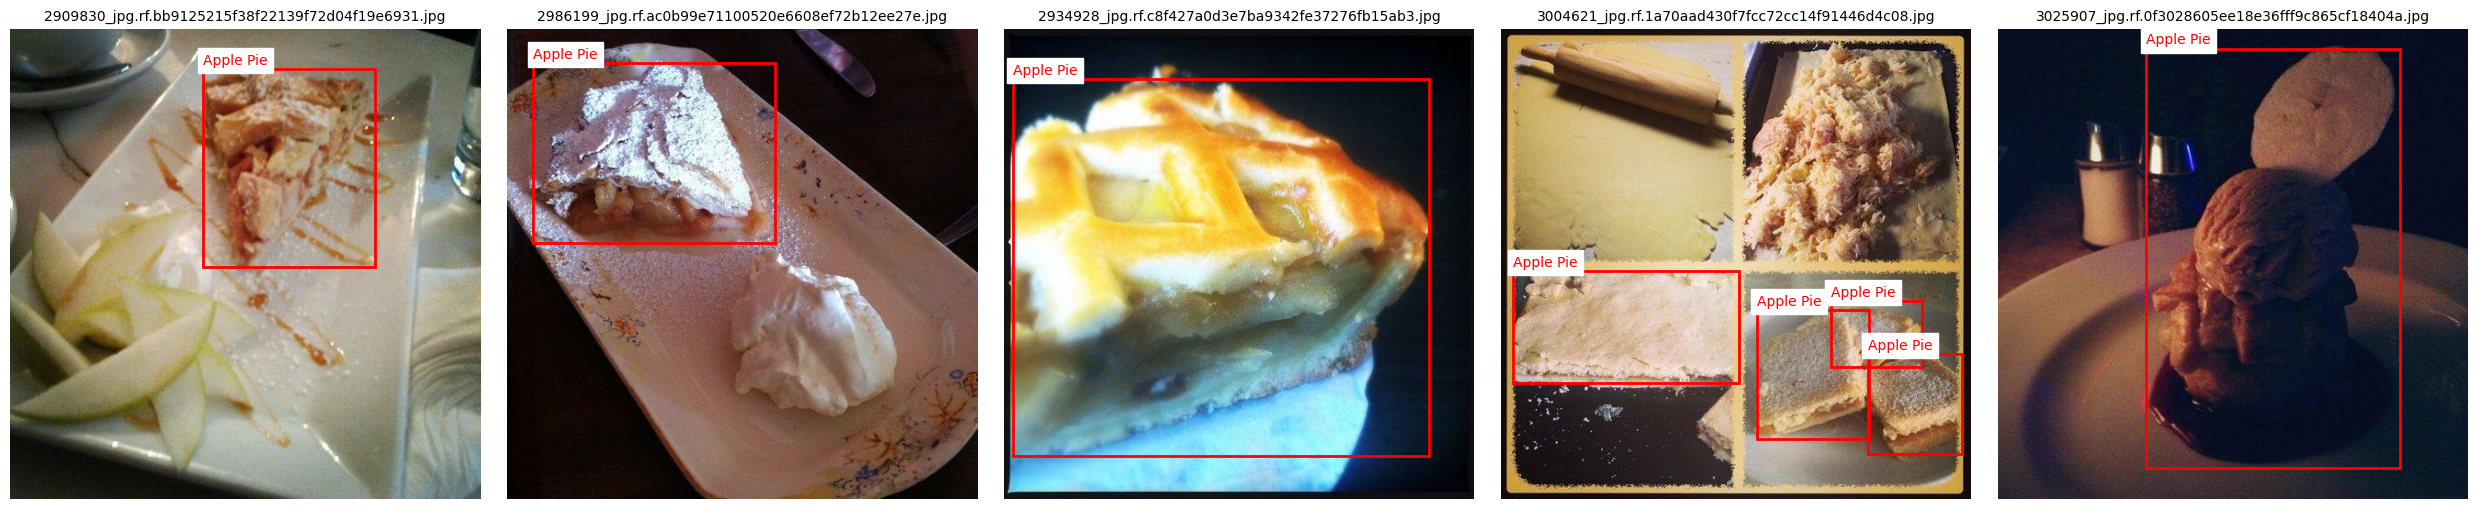

In [25]:
# Show 5 images with boxes only for 'Apple Pie'
show_bboxes(df, n=5, classes_to_show=['Apple Pie'])

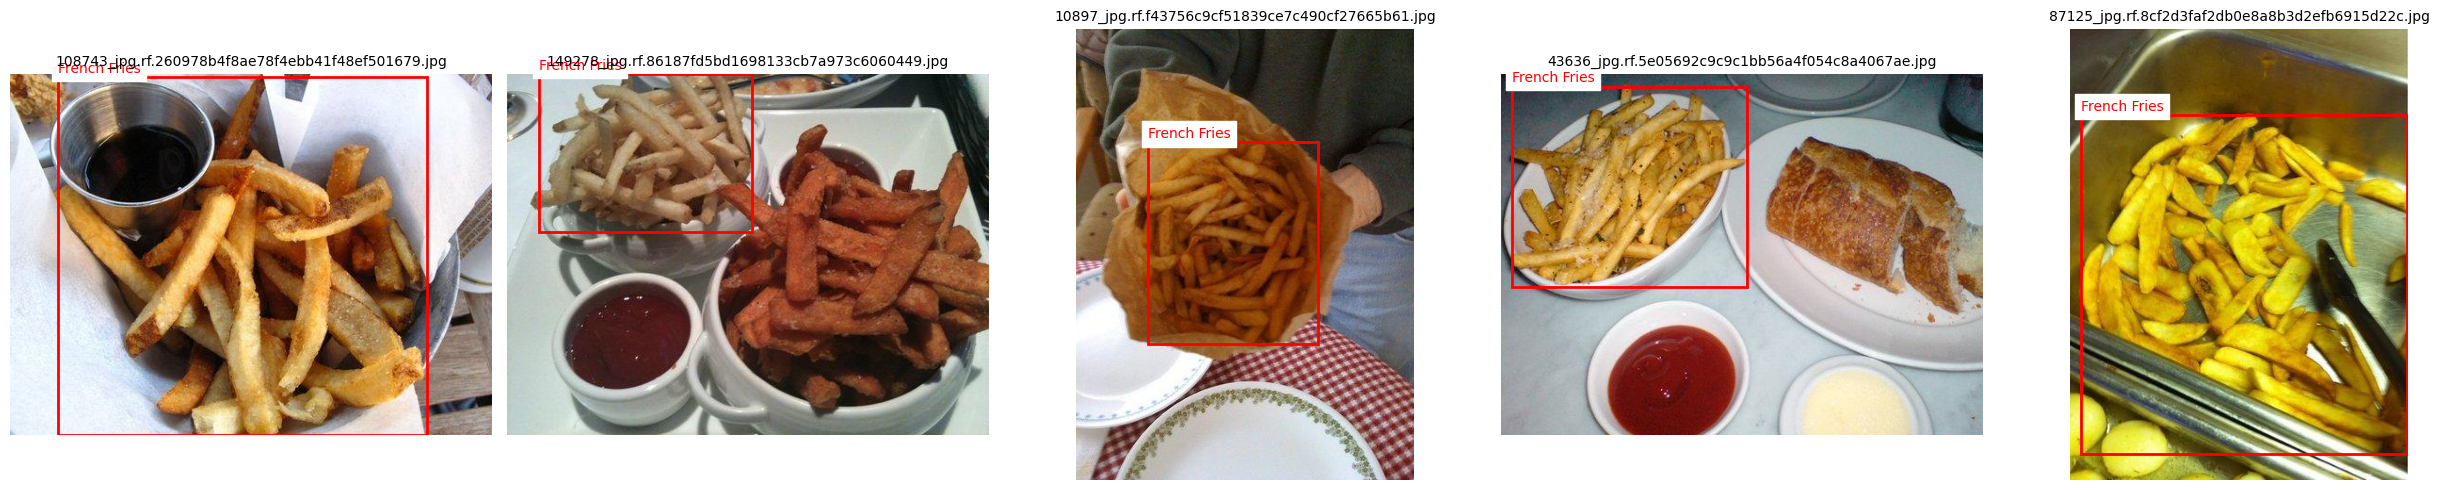

In [26]:
# Show 5 images with boxes only for 'French Fries'
show_bboxes(df, n=5, classes_to_show=['French Fries'])

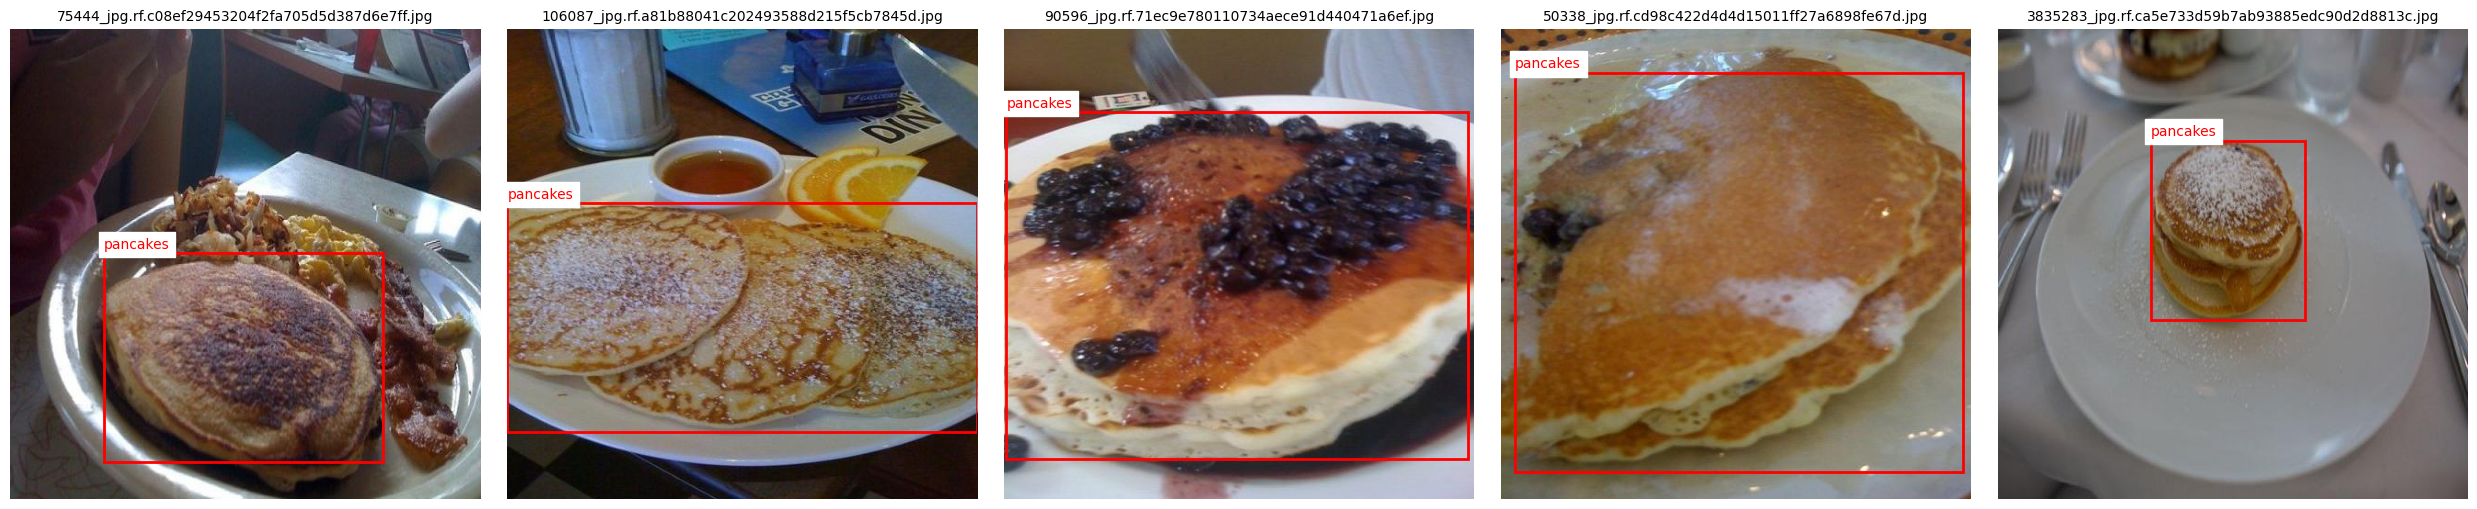

In [27]:
# Show 5 images with boxes only for 'pancakes'
show_bboxes(df, n=5, classes_to_show=['pancakes'])


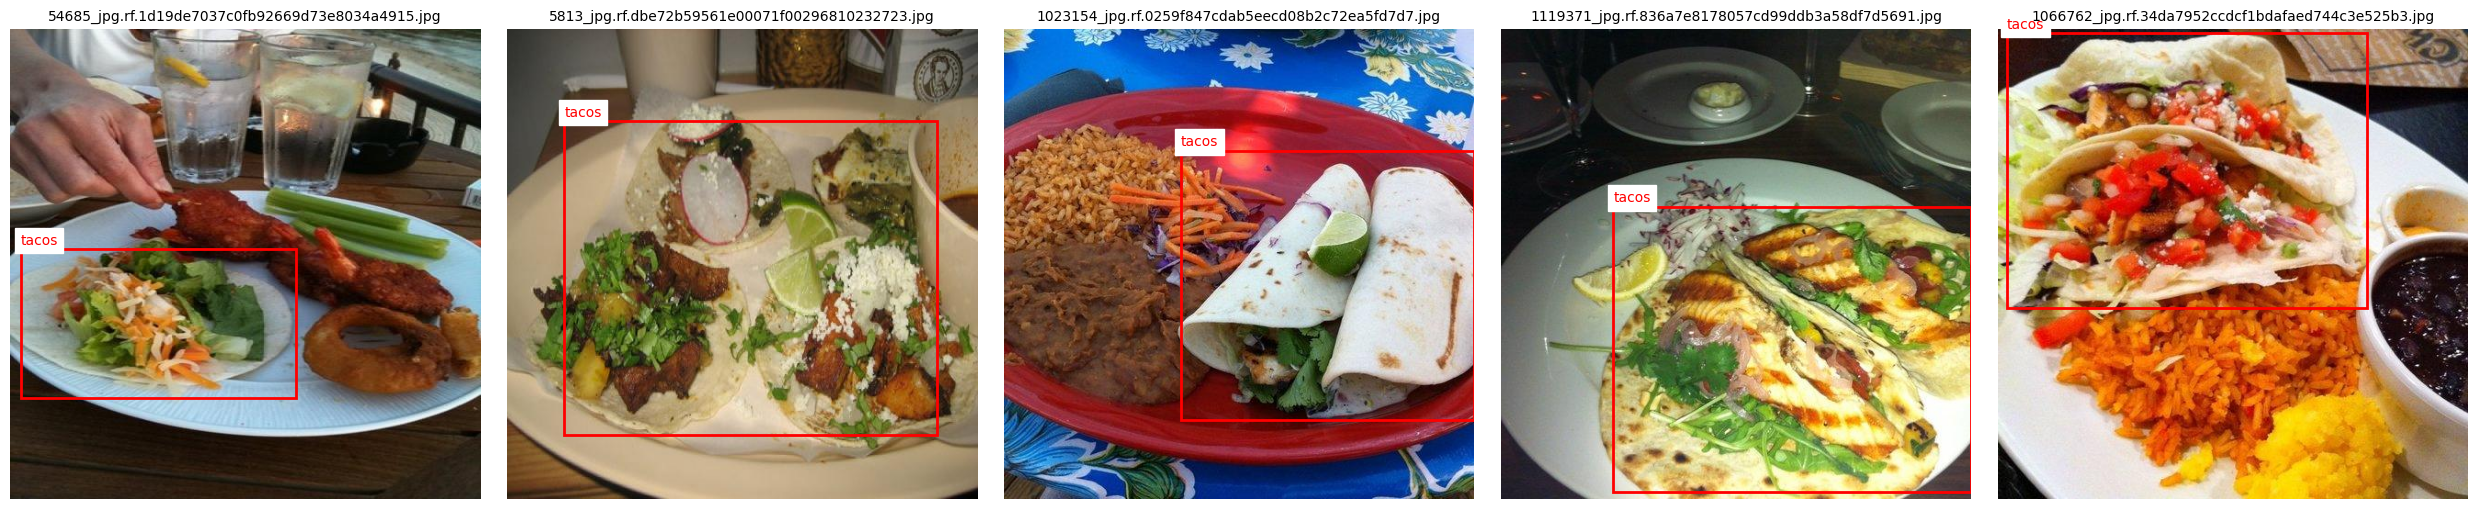

In [28]:
# Show 5 images with boxes only for 'tacos'
show_bboxes(df, n=5, classes_to_show=['tacos'])